# 0) При реализации алгоритма разрешается использовать только библиотеки из requierments.txt

В него входит:
1. jupyter - библиотека для показа ноутбуков
2. numpy - библиотека для вычислений
3. matplotlib - библиотека для визуализации

## Установка 

1. Устанавливаем python3 и virtualenv
2. создаем окружение virtualenv --no-site-packages  lin_prog
3. активируем окружение source activate lin_prog
4. устанавливаем зависимости pip install -r requirements.txt
5. запускаем jupyter и начинаем работать jupyter notebook



# ============================================================
# Задача на Симплекс метод

## 1) На вход Вашему функцию должны приходить:

0. число переменных = n
1. матрица A (n x m) (tsv, вещественные числа)
2. вектор  b  ограничений типа неравнство
4. вектор c функции полезности для задачи max cx 
5. алгоритм выбора входящей переменной (правило Бленда, Лексикографический метод)
6. (не обязательный параметр) стартовую базисную точку

## 2) На выход программа должна выдавать:

### Обязательная часть (0.7 баллов):
0. Ответ и оптимальную точку при положительных компонентах вектора b
1. Количество итераций потребовавшихся для решения задачи
2. при n=2 выдавать процесс решения (draw=True)
3. Напишите программу которая будет отвечать на вопрос оптимально ли приведенное решение, например


### Дополнительная часть  (0.4 балл):
0. Максимально использовать матричные вычисления (0.2 балла)
1. Работать в случае отрицательных чисел в векторе b (0.2 балла)




In [125]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import warnings
warnings.simplefilter("ignore")
import numpy as np
%matplotlib inline

In [200]:
class Simplex():
    
    def __init__(self, f, num, c, CF=False,k=False):
        f = np.array(A, dtype=np.float64)
        num = np.array(b, dtype=np.float64)
        c = np.array(c, dtype=np.float64)
        self.n = len(c)
        self.initial_n = self.n
        self.m = len(b)
        self.f = f
        self.num = num
        self.c = c
        self.initial_f = f
        self.initial_num = num
        self.initial_c = c
        self.added=CF
        self.CF = CF
        self.hist = []
        self.format = CF
        if CF:
            self.n -= self.m
            self.initial_n -= self.m

    def AddinVar(self):
        r = !self.CF
        if r==True:  
            self.c = np.append(self.c, np.zeros(self.m))
            self.f = np.hstack([self.f, np.eye(self.m)])
            self.added = True
            selt.k=True
        
    def leave(self, e, met):
        if met in [1, 3]:
            idx = np.argwhere(self.f[:,e] > 0)
            num = self.num.T[idx]
            den = self.f[:,e][idx]
            div = num / den
            return idx[np.argmin(div)][0]
        elif met == 2:
            u = self.A[:,e]
            idx = np.argwhere(u > 0).ravel()
            f_lexic = self.f.copy()
            num_lexic = self.num.copy()
            f_lexic /= u.reshape((self.met, 1))
            num_lexic = bnumlexic / u.reshape((1, self.met))
            return idx[np.lexsort(([f_lexic[idx,i] for i in range(f_lexic.shape[1])][::-1] + 
                                   [num_lexic.reshape((self.met, ))[idx]]))[0]]
        
    def checkPoint(self, point, c):
        if c[3]:
            #print('$$$$$$$$$$4',c[3])
            return point[0] * c[0] + point[1] * c[1] >= c[2]
        else:
            return point[0] * c[0] + point[1] * c[1] <= c[2]
    def SearchEnt(self, met):
        if met == 1:
            temp = self.c.copy()
            temp[temp <= 0] = 0
            return temp.nonzero()[0][0]
        elif met == 2:
            temp = self.c.copy()
            temp[temp <= 0] = 0
            return np.random.choice(temp.nonzero()[0])
        elif met == 3:
                return np.argmax(self.c)
    def points(self):
        if self.CF:
            initial = np.zeros_like(self.c)
            initial[self.bv] = self.b
            return initial
        else:
            initial = np.zeros(self.n)
            indices_initial = np.argwhere(self.bv < self.n)
            if len(indices_initial) > 0:
                initial[self.bv[indices_initial.ravel()]] = self.bv[indices_initial.ravel()]
                return initial
    
    def step(self, met, entering_idx=None, l_idx=None,
                  add_to_history=True, update_bv=True):
        if update_bv:
            if entering_idx is None:
                entering_idx = self.SearchEnt(met)
            if l_idx is None:
                l_idx = self.leave(entering_idx, met)
            self.bv = np.append(self.bv,entering_idx)
            self.bv = np.delete(self.bv,l_idx)
        g = [[ 1.0,1.0], [0.0,  2.0]]
        #rint(type(g))
        #=np.append(g,self.bv)
        #rint(self.f)
        #rint(g)
        #=np.reshape(g,(2,3))
        #rint(self.f)
        #rint(g)
        inv_g = np.linalg.inv(g)
        c_num = [ -0.0,  -5.0]
        new_c = c_num @ inv_g @ self.f + self.c.T
        new_f = inv_g @ self.f
        new_num = inv_g @ self.num
        self.f = new_f
        self.num = new_num
        self.c = new_c

        if add_to_history:
             self.hist.append(list(self.points()))


    def op(self, c1, c2):
        a, b, c, op_1 = c1
        d, e, f, op_2 = c2

        if op_1:
            a *= -1*a  
            b *= -1*b  
            c *= -1*c
        if op_2:
            d *= -1*d
            e *= -1*e
            f *= -1*f
        try:
            result = np.linalg.solve(np.array([[a, b], [d, e]]), np.array([c, f]))
            return list(result)
        except:
            return None
    
    def draw(self):
        k=True
        cond = []
        plt.figure(figsize=(8, 5 * np.ceil(len(self.hist) / 2)))
        points = self.hist.copy()
        for i in range(self.m):
            cond.append((self.initial_f[i][0], self.initial_f[i][1], self.initial_num[i], 0))
            cond.append((1, 0, 0, 1))
            cond.append((0, 1, 0, 1))

 
        for c1 in cond:
            for c2 in cond:
                intersection = self.op(c1,c2)
                if intersection not in points and intersection is not None:
                    points.append(intersection)

        convex_points = []
        for point in points:
            sa = True
        for c in cond:
            if not self.checkPoint(point, c):
                sa = False
            if sa:
                convex_points.append(point)
        for i, current_point in enumerate(self.hist):
            plt.subplot(np.ceil(len(self.hist) / 2), 2, i + 1)
            maximum = 0
            for point in convex_points:
                plt.scatter(point[0], point[1], color='red', alpha=0.5)
                plt.figure(figsize=(4, 6))
            maximum = max(maximum, point[0], point[1])
            grid = np.linspace(0, maximum * 1.5, 1100)
            for co in cond:
                a, b, c, op = co
                print(co)
                if b != 0:
                    plt.plot(grid, (c - a * grid) / b, color='red', linewidth=2, alpha=0.7)
                else:
                    pass
                
                    plt.plot(np.ones_like(grid) * c / a, grid, linewidth=2, color='red', alpha=0.7)

                if i == len(self.hist) - 1:
                    plt.scatter(current_point[0], current_point[1], s=200, color='blue', marker='*')
                else:
                    plt.scatter(current_point[0], current_point[1], s=120, color='blue', alpha=0.55)
                plt.xlim((-1 / maximum, maximum * 1))
                plt.ylim((-1 / maximum, maximum * 1))               
    def Ph_1(self, met):
        self.n += 1
        self.bv = np.arange(self.n, self.n + self.m)
        self.A = np.hstack([(np.ones(self.m) * -1).reshape(self.m,1), self.A])
        self.c = np.hstack([[-1], np.zeros_like(self.c)])
        entering_idx = 0
        lng_idx = np.argmin(self.initial_b)
        self.step(met, entering_idx, l_idx, add_to_history=False)
        while self.c[0] == 0:
            self.step(met, add_to_history=False)
        return self.bv
    def opt_sol(self):
            return np.max(self.c) <= 1e-7
    def maximum(self):
        return np.sum(self.initial_c * self.points())
    def opt_sol_found(self):
            return np.max(self.c) <= 1e-7
    def solve(self, met=1, start_point=None, draw=False, max_iter=1e6):
        self.AddinVar()
        iterations = 0
        if np.min(self.initial_num) < 0:
            self.bv = self.fPh_1(met) - 1
            self.f = self.initial_f
            self.num = self.initial_num
            self.c = self.initial_c
            self.added = False
            self.n -= 1
            self.AddinVar()
            self.step(met, update_bv=False, add_to_history=False)
            iterations += 1
        else:
            self.bv = np.arange(self.n, self.n + self.m)
        if start_point is not None:
            self.bv = np.array(start_point)
            self.step(met, update_bv=False, add_to_history=False)
            self.hist.append(list(self.points()))
        while not self.opt_sol() and iterations < max_iter:
            self.step(met)
            iterations += 1
        if draw and self.n == 2:
            self.draw()
        return list(self.points()), self.maximum(), iterations

In [201]:
def solve_lin_prog (A, b, c, met=1, start_point=None, draw=False):
    return Simplex(A, b, c).solve(met=met, start_point=start_point, draw=draw)
def is_optimal (A, b, c, x):
    return Simplex(A, b, c).is_optimal(x)

(1.0, 3.0, 5.0, 0)
(1, 0, 0, 1)
(0, 1, 0, 1)
(2.0, 0.5, 8.0, 0)
(1, 0, 0, 1)
(0, 1, 0, 1)


([0.0, 0.0], 0.0, 1)

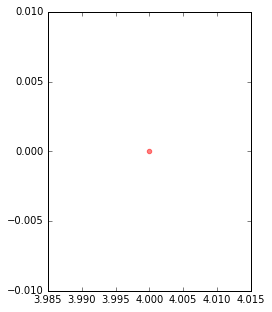

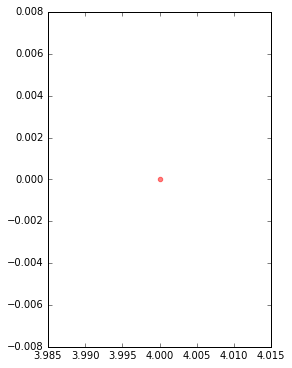

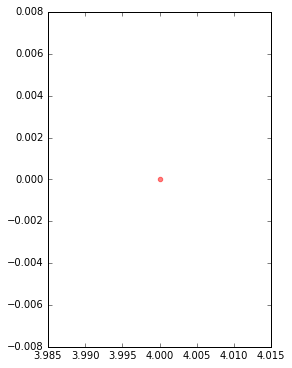

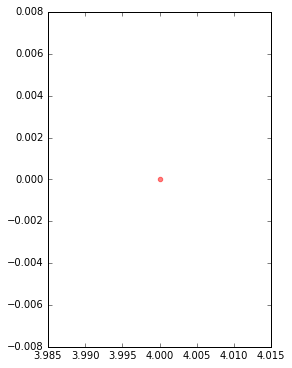

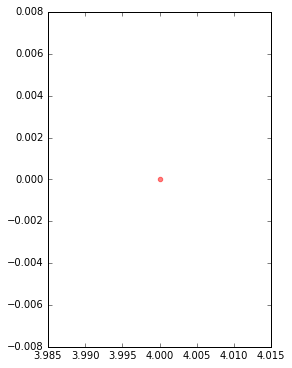

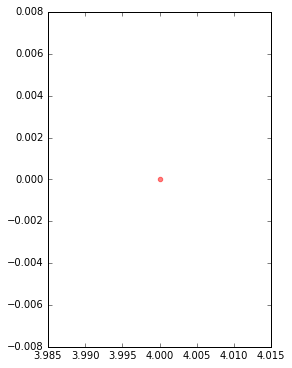

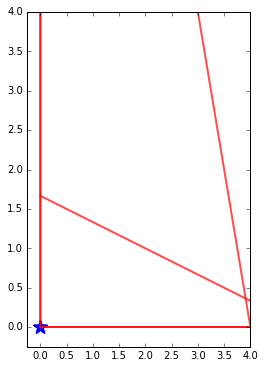

In [202]:
f = np.array([[1,3],[2,0.5]])
num = np.array([5,8])
c = np.array([5,1])
solve_lin_prog(A, b, c, draw=True)

In [ ]:
x = solve_lin_prog(A,b,c, draw=True)